# What is PCA ?

Principal Component Analysis (PCA) is a dimensionality reduction technique used in machine learning and statisics. It transforms high-dimensional data into a lower-dimensional space while preserving as much information as possible.

# Key Goals of PCA:

* Reduce the number of features while retaining the most important information.
* Remove redundancy and correlations in the data.
* Improve computational efficiency for machine learning algorithms.
* Help visualize high-dimensional data in 2D or 3D.

# Why Use PCA ?

* High-dimensional data is difficult to process  
  if we have many features, some may be redundant or highly correlated. PCA helps remoce unnecesssary dimensions.
* Reduces Overfitting  
  Too many features can cause overfitting. PCA helps by keeping only the most significant features.
* Speeds up Machine Learning Algorithms  
  Many ML models work better with fewer dimensions, especially models that involves distance calculations (e.g., KNN,SVM).
* Better Visualizaion  
  PCA allows us to reduce dimensionns to 2D or 3D, making it easier to plot and understand data.

In [57]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

In [2]:
df = pd.read_csv("Titanic_dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [4]:
# Filling missing values in age and fare
df["Age"].fillna(df["Age"].mode()[0], inplace = True)
df["Fare"].fillna(df["Fare"].mode()[0], inplace = True)

In [5]:
df.dropna(axis = 1, inplace = True) # drop remaining 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.1+ KB


# Convert categorical variable to numerical

* Since PCA work with numerical data, we must encode categorical variables.

In [7]:
# convert categorical variable to numerical variable using label encoding
encoder = LabelEncoder()

df["Sex"] = encoder.fit_transform(df["Sex"])  # Male = 1, Female = 0
df["Embarked"] = encoder.fit_transform(df["Embarked"])  # C = 0, Q = 1, S = 2

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,2
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,1
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,2
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,2


# Standardize the Data

Since PCA is affected by different scaled, we'll standardize the numerical features.

In [59]:
# Select only numerical columns
numerical_features = ["PassengerId","Survived","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_features])
scaled_data

array([[-1.72791209, -0.75592895,  0.87348191, ..., -0.4002477 ,
        -0.49706313, -0.47091535],
       [-1.71962474,  1.32287566,  0.87348191, ..., -0.4002477 ,
        -0.51192594,  0.70076689],
       [-1.71133739, -0.75592895, -0.31581919, ..., -0.4002477 ,
        -0.46375447, -0.47091535],
       ...,
       [ 1.71133739, -0.75592895,  0.87348191, ..., -0.4002477 ,
        -0.50744487,  0.70076689],
       [ 1.71962474, -0.75592895,  0.87348191, ..., -0.4002477 ,
        -0.49310546,  0.70076689],
       [ 1.72791209, -0.75592895,  0.87348191, ...,  0.61989583,
        -0.23663968, -1.64259759]])

# Apply PCA
* We will reduce the dataset to two principle components for visualization.

In [25]:
# Apply PCA with 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Convert to DataFrame

pca_df = pd.DataFrame(data = principal_components, columns = ["PC1","PC2"])
pca_df["Survived"] = df["Survived"] # Keep survived information for visualization

In [26]:
pca_df.head()

,PC1,PC2,Survived
0,-1.194035,-0.601151,0
1,0.983275,1.258151,1
2,-0.133338,-2.085382,0
3,-1.592724,-0.073717,0
4,0.693179,2.288693,1


# Explained Variance Ratio
* This tells us how many informaion each principal component retains.

In [42]:
print("Explained Variance Ratio :",pca.explained_variance_ratio_)

Explained Variance Ratio : [0.26762725 0.20054956 0.14471979 0.11131591 0.09920743 0.07689162]


In [43]:
np.cumsum(pca.explained_variance_ratio_)

array([0.26762725, 0.46817681, 0.6128966 , 0.72421252, 0.82341994,
       0.90031157])

# Visualizing PCA

* Scatter plot for principal components  
  We visualize how the passengers are distrubuted in the new 2D space.

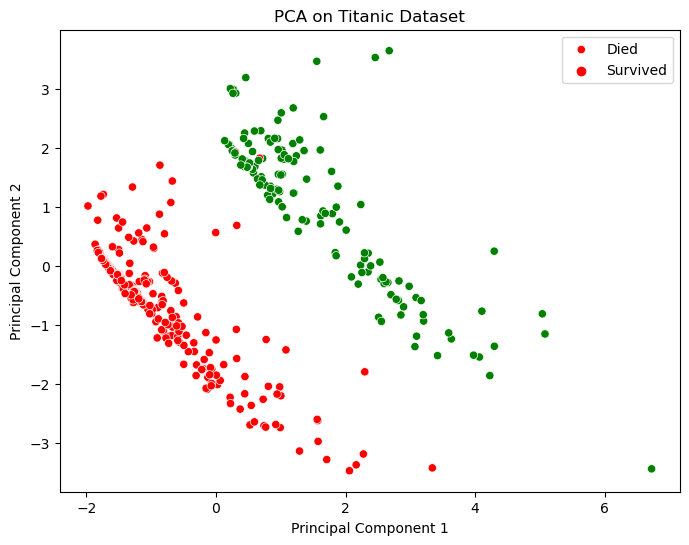

In [33]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_df["PC1"],y=pca_df["PC2"],hue=pca_df["Survived"],palette=["red","green"])
plt.title("PCA on Titanic Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(["Died","Survived"])
plt.show()

# Choosing the Optimal Number Of Components  
* Instead of manually selecting n_components = 2, let'scheck how many components capture most of the variance.

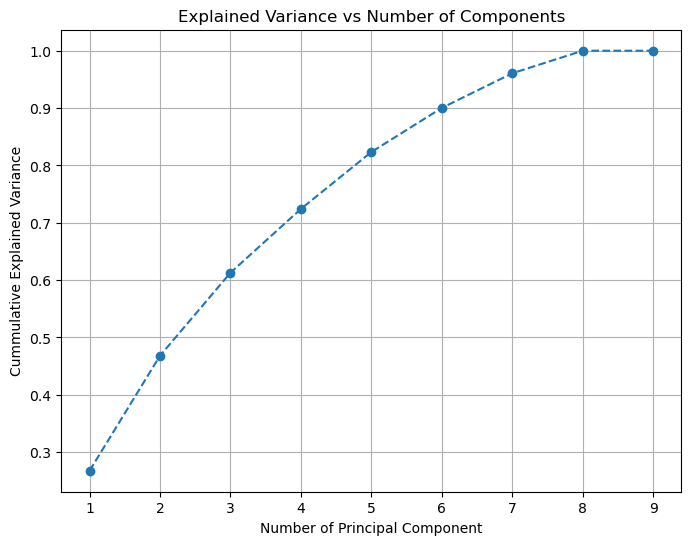

In [48]:
# Apply PCA with all components
pca_full = PCA()
pca_full.fit(scaled_data)

# Plot cummulative explained variance
plt.figure(figsize=(8,6))
plt.plot(range(1,len(numerical_features)+1),np.cumsum(pca_full.explained_variance_ratio_),marker="o", linestyle="--")
plt.xlabel("Number of Principal Component")
plt.ylabel("Cummulative Explained Variance")
plt.title("Explained Variance vs Number of Components")
plt.grid()
plt.show()

In [53]:
# Apply PCA with 6 components
pca_6 = PCA(n_components=6)
principal_components = pca_6.fit_transform(scaled_data)

# Convert to DataFrame

pca_6_df = pd.DataFrame(data = principal_components, columns = ["PC1","PC2","PC3","PC4","PC5","PC6"])
pca_6_df["Survived"] = df["Survived"] # Keep survived information for visualization

In [54]:
np.cumsum(pca_6.explained_variance_ratio_)

array([0.26762725, 0.46817681, 0.6128966 , 0.72421252, 0.82341994,
       0.90031157])

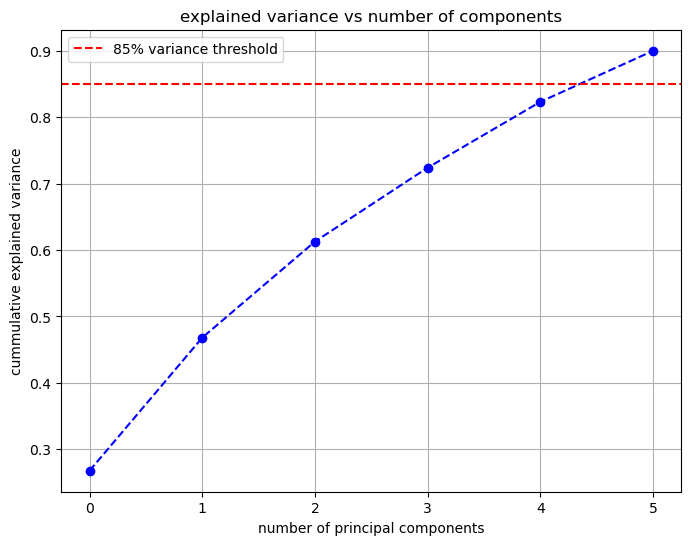

In [55]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca_6.explained_variance_ratio_),marker="o",linestyle="--",color="b")
plt.axhline(y=0.85,color="r",linestyle="--",label="85% variance threshold")
plt.xlabel("number of principal components")
plt.ylabel("cummulative explained variance")
plt.title("explained variance vs number of components")
plt.legend()
plt.grid()
plt.show()